C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


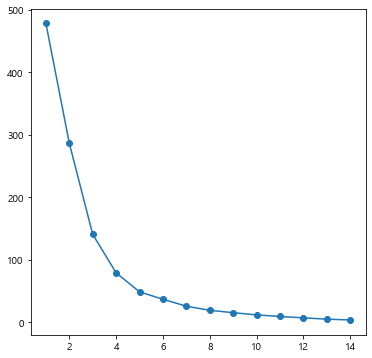

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


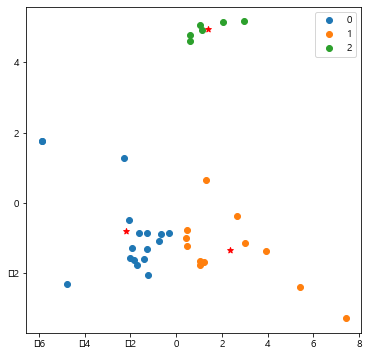

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.rc('font', family='Malgun Gothic')

#### 데이터 불러오기 ####
# 연도를 index로 하여 데이터 불러오기
df = pd.read_csv('./Data/외래관광객_연령별_여행참여(전처리).csv', index_col='연도')

#### 결측치 처리 ####
# 일단 0으로 채우고 만들어 본 다음에 다양한 값으로 채워서 비교
df.isna().sum() # 결측치 확인
df = df.fillna(0) # 결측치 0으로 채움
# df = df.fillna(df.mean()) # 결측치 평균으로 채움
# df = df.fillna(method='ffill') # 앞 방향으로 채우기
df.isna().sum() # 채워졌는지 재 확인

#### 판다스 dummies로 연령, 연도 컬럼의 범주를 컬럼으로 변경 ####
df = pd.get_dummies(df, columns=['연령'])


#### 스케일링 ####
scaler = StandardScaler()
df_scaled = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns)


#### 차원축소 ####
pca = PCA(n_components=2) # CPA 생성
pca_tr = pca.fit_transform(df_scaled) # 학습, 변환

df_scaled['pca_x'] = pca_tr[:,0]
df_scaled['pca_y'] = pca_tr[:,1]


#### 군집 개수 구하기 ####
inertias = [] # 응집도 넣을 변수
for i in range(1, 15):
    test = KMeans(n_clusters=i, init='k-means++')
    test.fit(df_scaled[['pca_x', 'pca_y']])
    inertias.append(test.inertia_)

#### 군집 개수 시각화 ####
plt.figure(figsize=(6,6))
plt.plot(range(1, 15), inertias, '-o') # 3 ~ 5


#### 군집 ####
model = KMeans(n_clusters=3, init='k-means++')
model.fit(df_scaled[['pca_x', 'pca_y']])
center = model.cluster_centers_
df_scaled['cluster'] = model.labels_


#### 군집 시각화 ####
c_length = len(df_scaled['cluster'].unique())

plt.figure(figsize=(6,6))
for i in range(c_length):
    plt.scatter(df_scaled[df_scaled['cluster'] == i]['pca_x'], df_scaled[df_scaled['cluster'] == i]['pca_y'], label=f'{i}')
plt.scatter(center[:,0], center[:,1], c='r', marker='*')
plt.legend()

<ipython-input-16-3e696770dd63>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(24,36))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


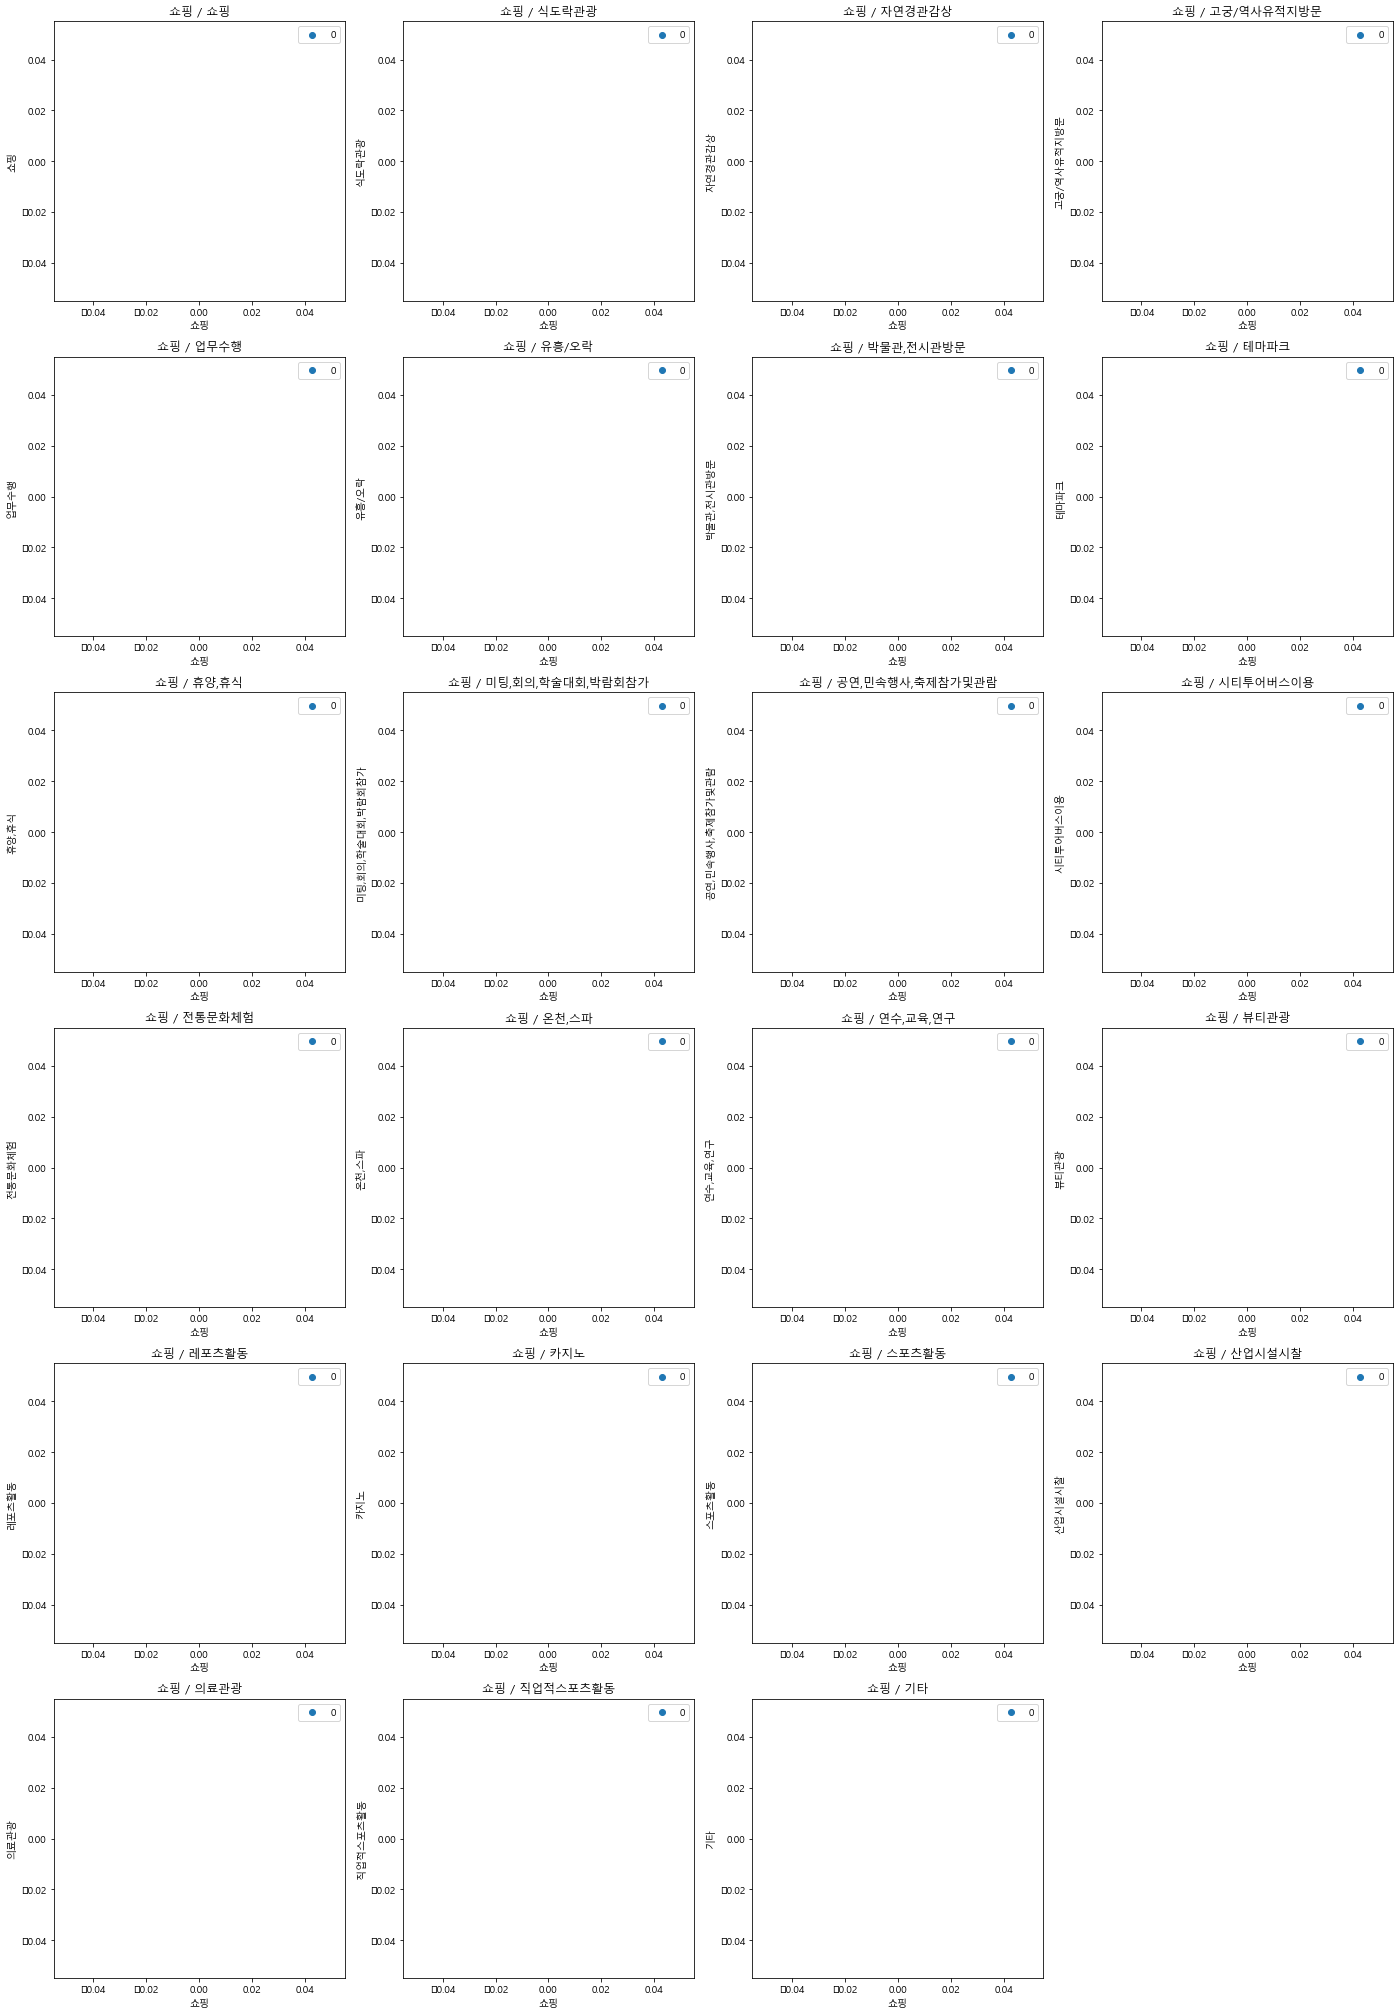

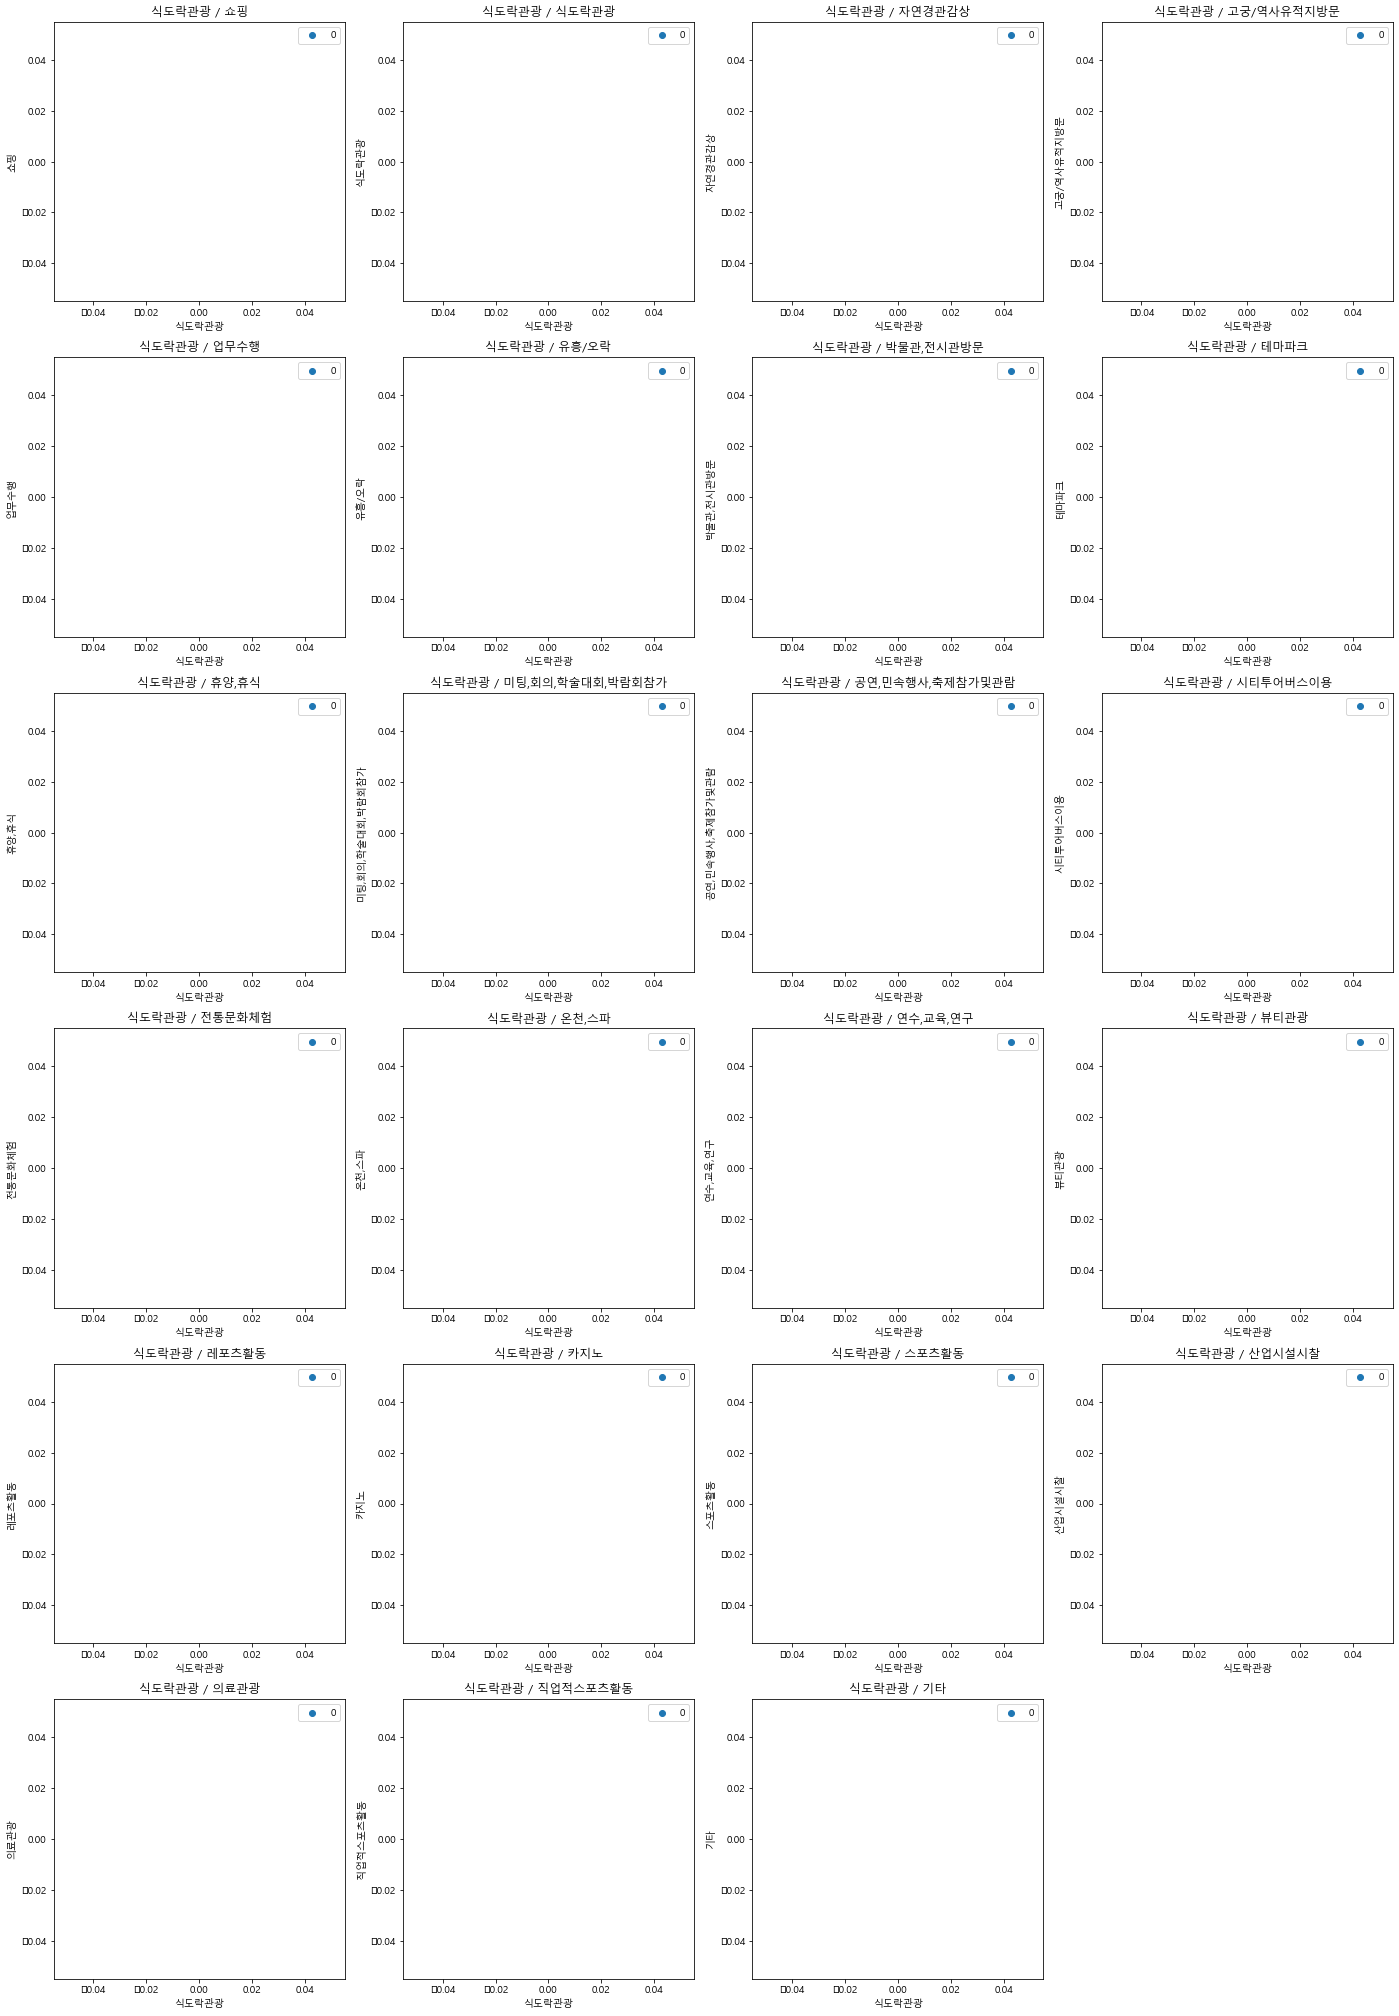

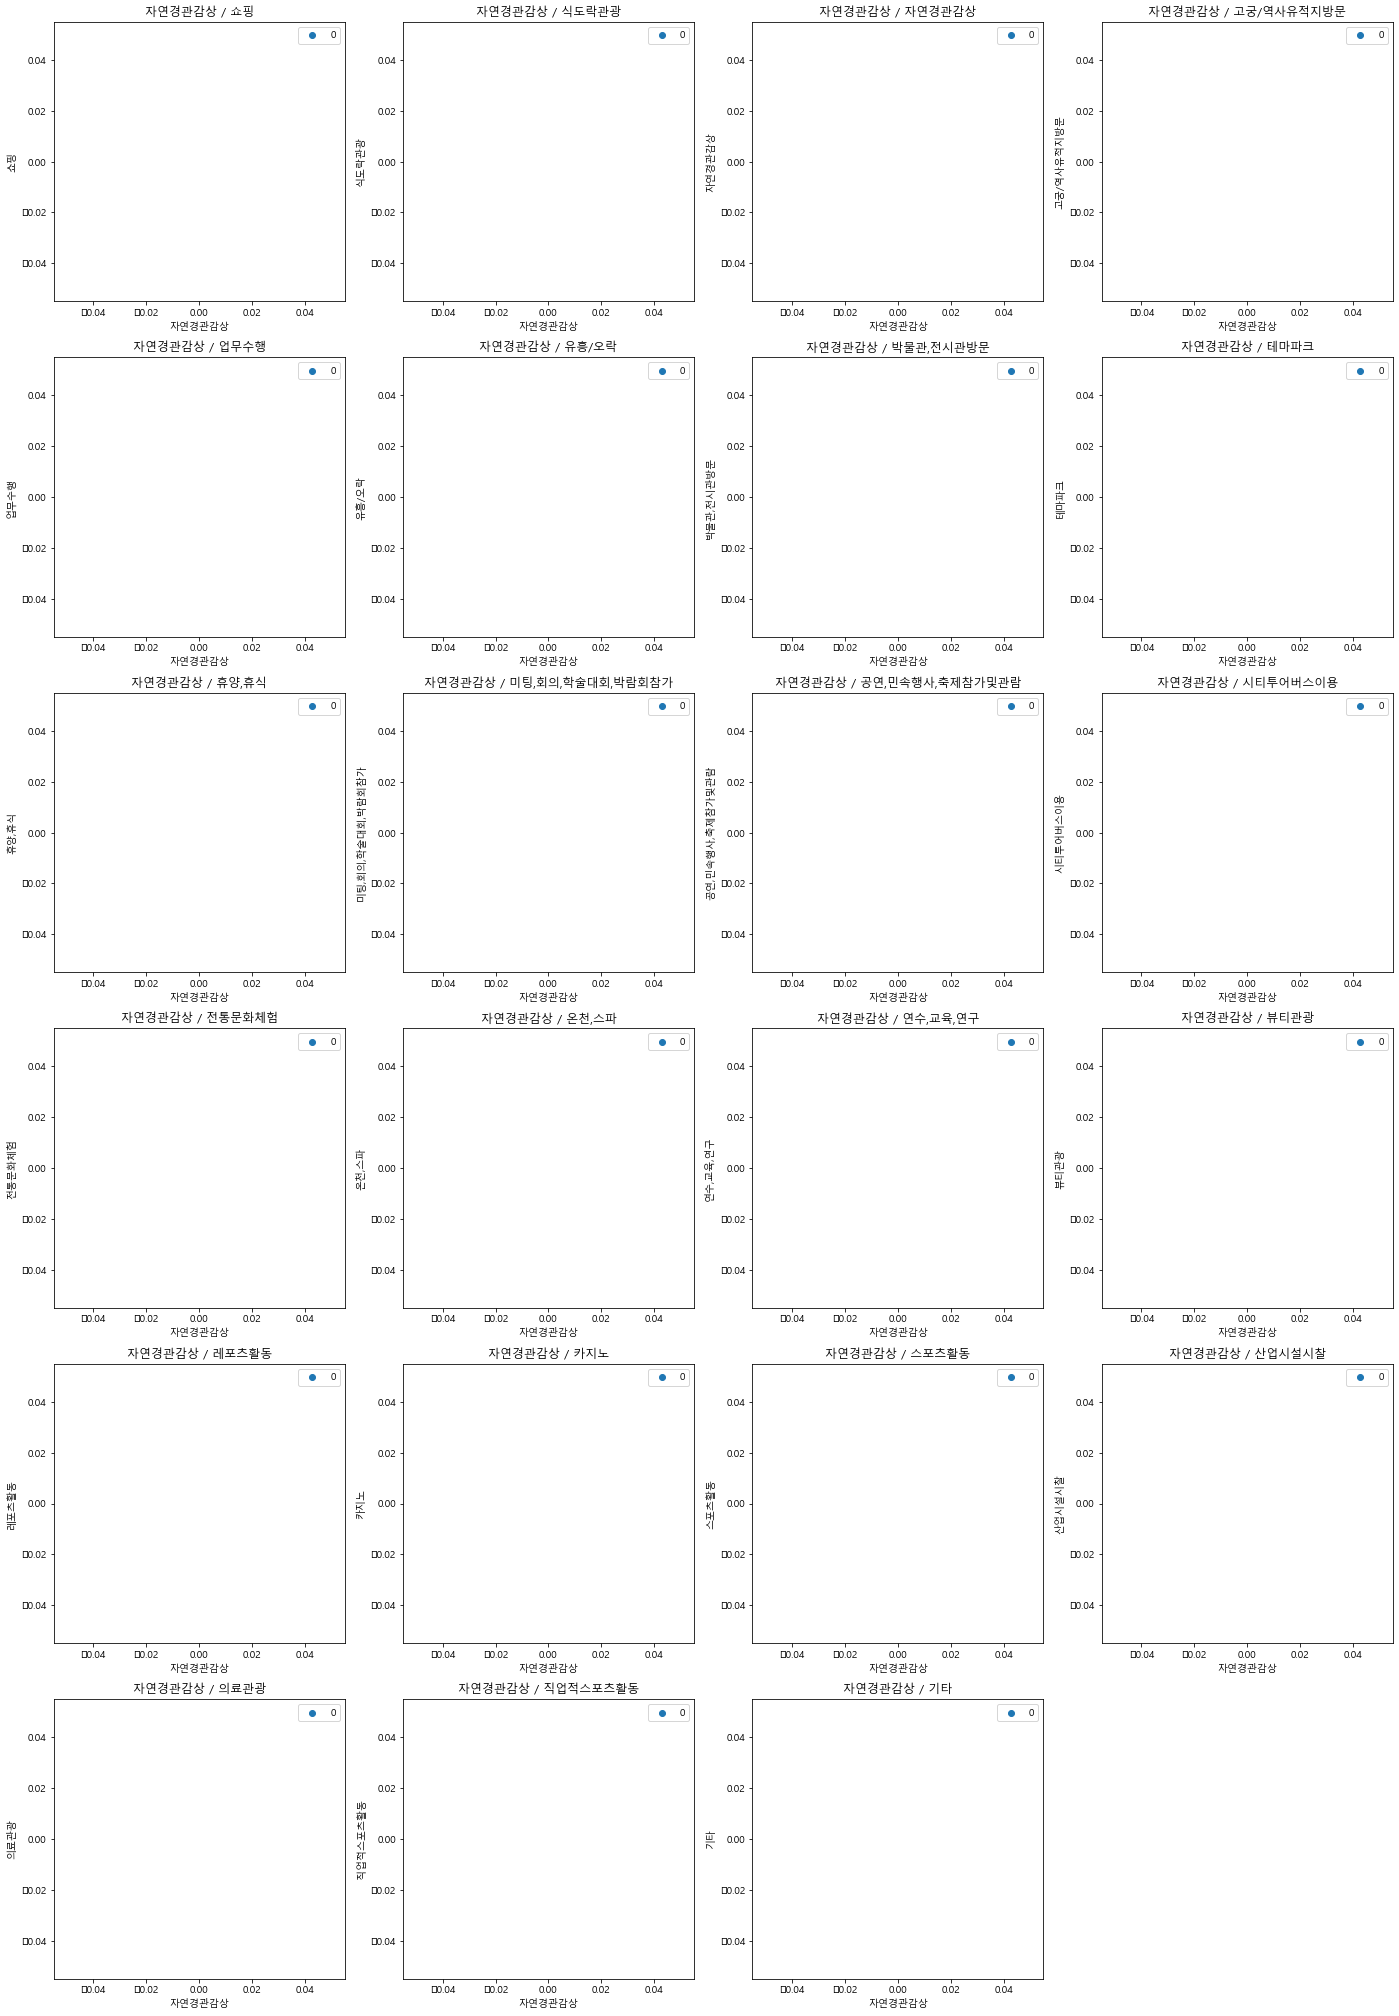

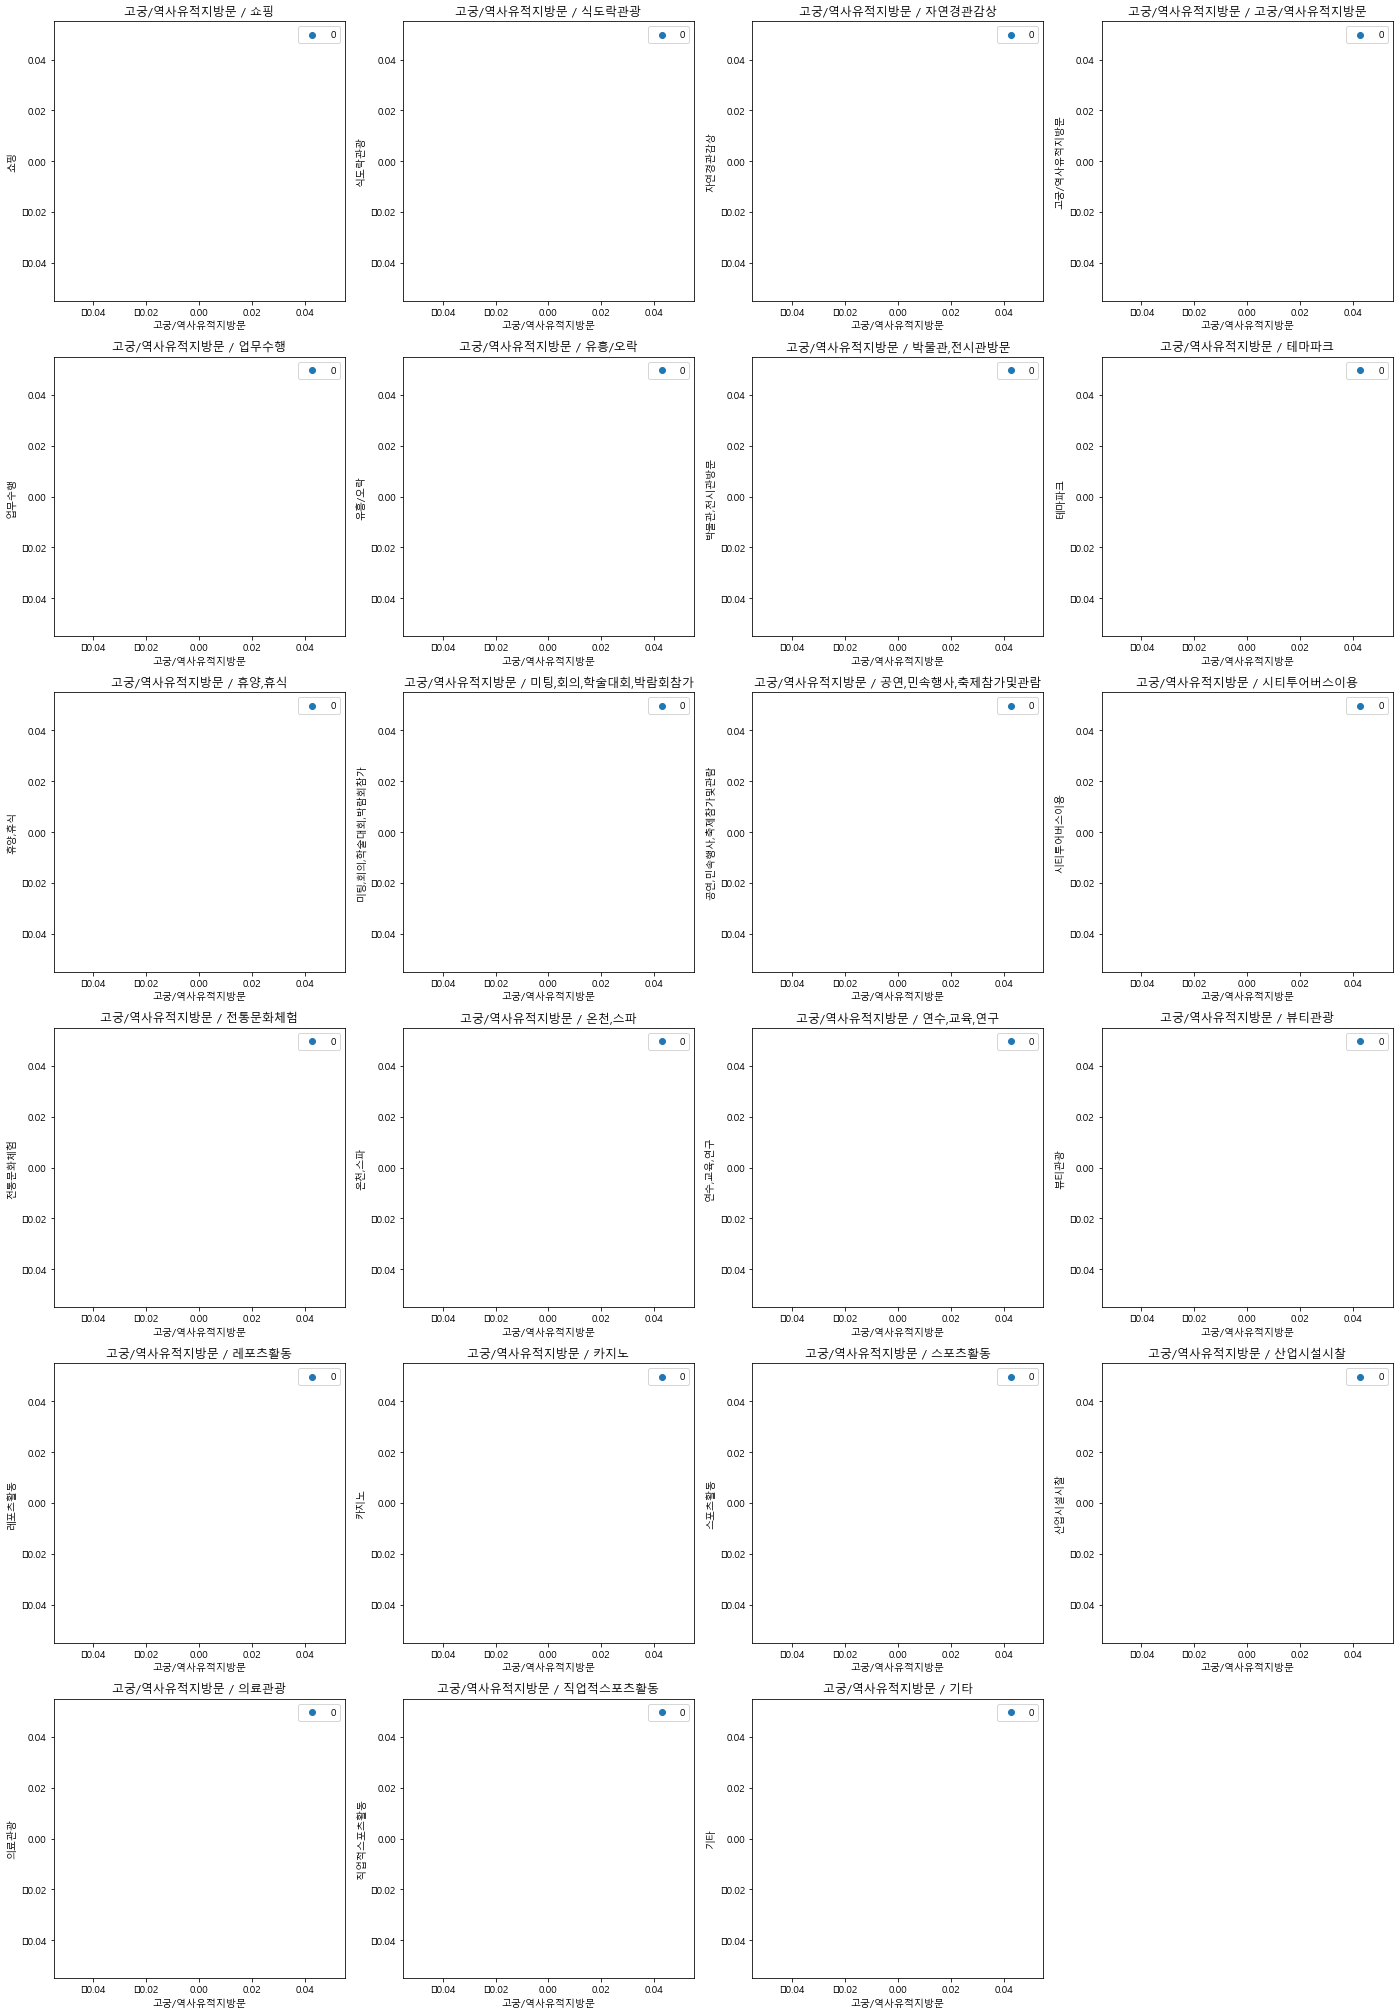

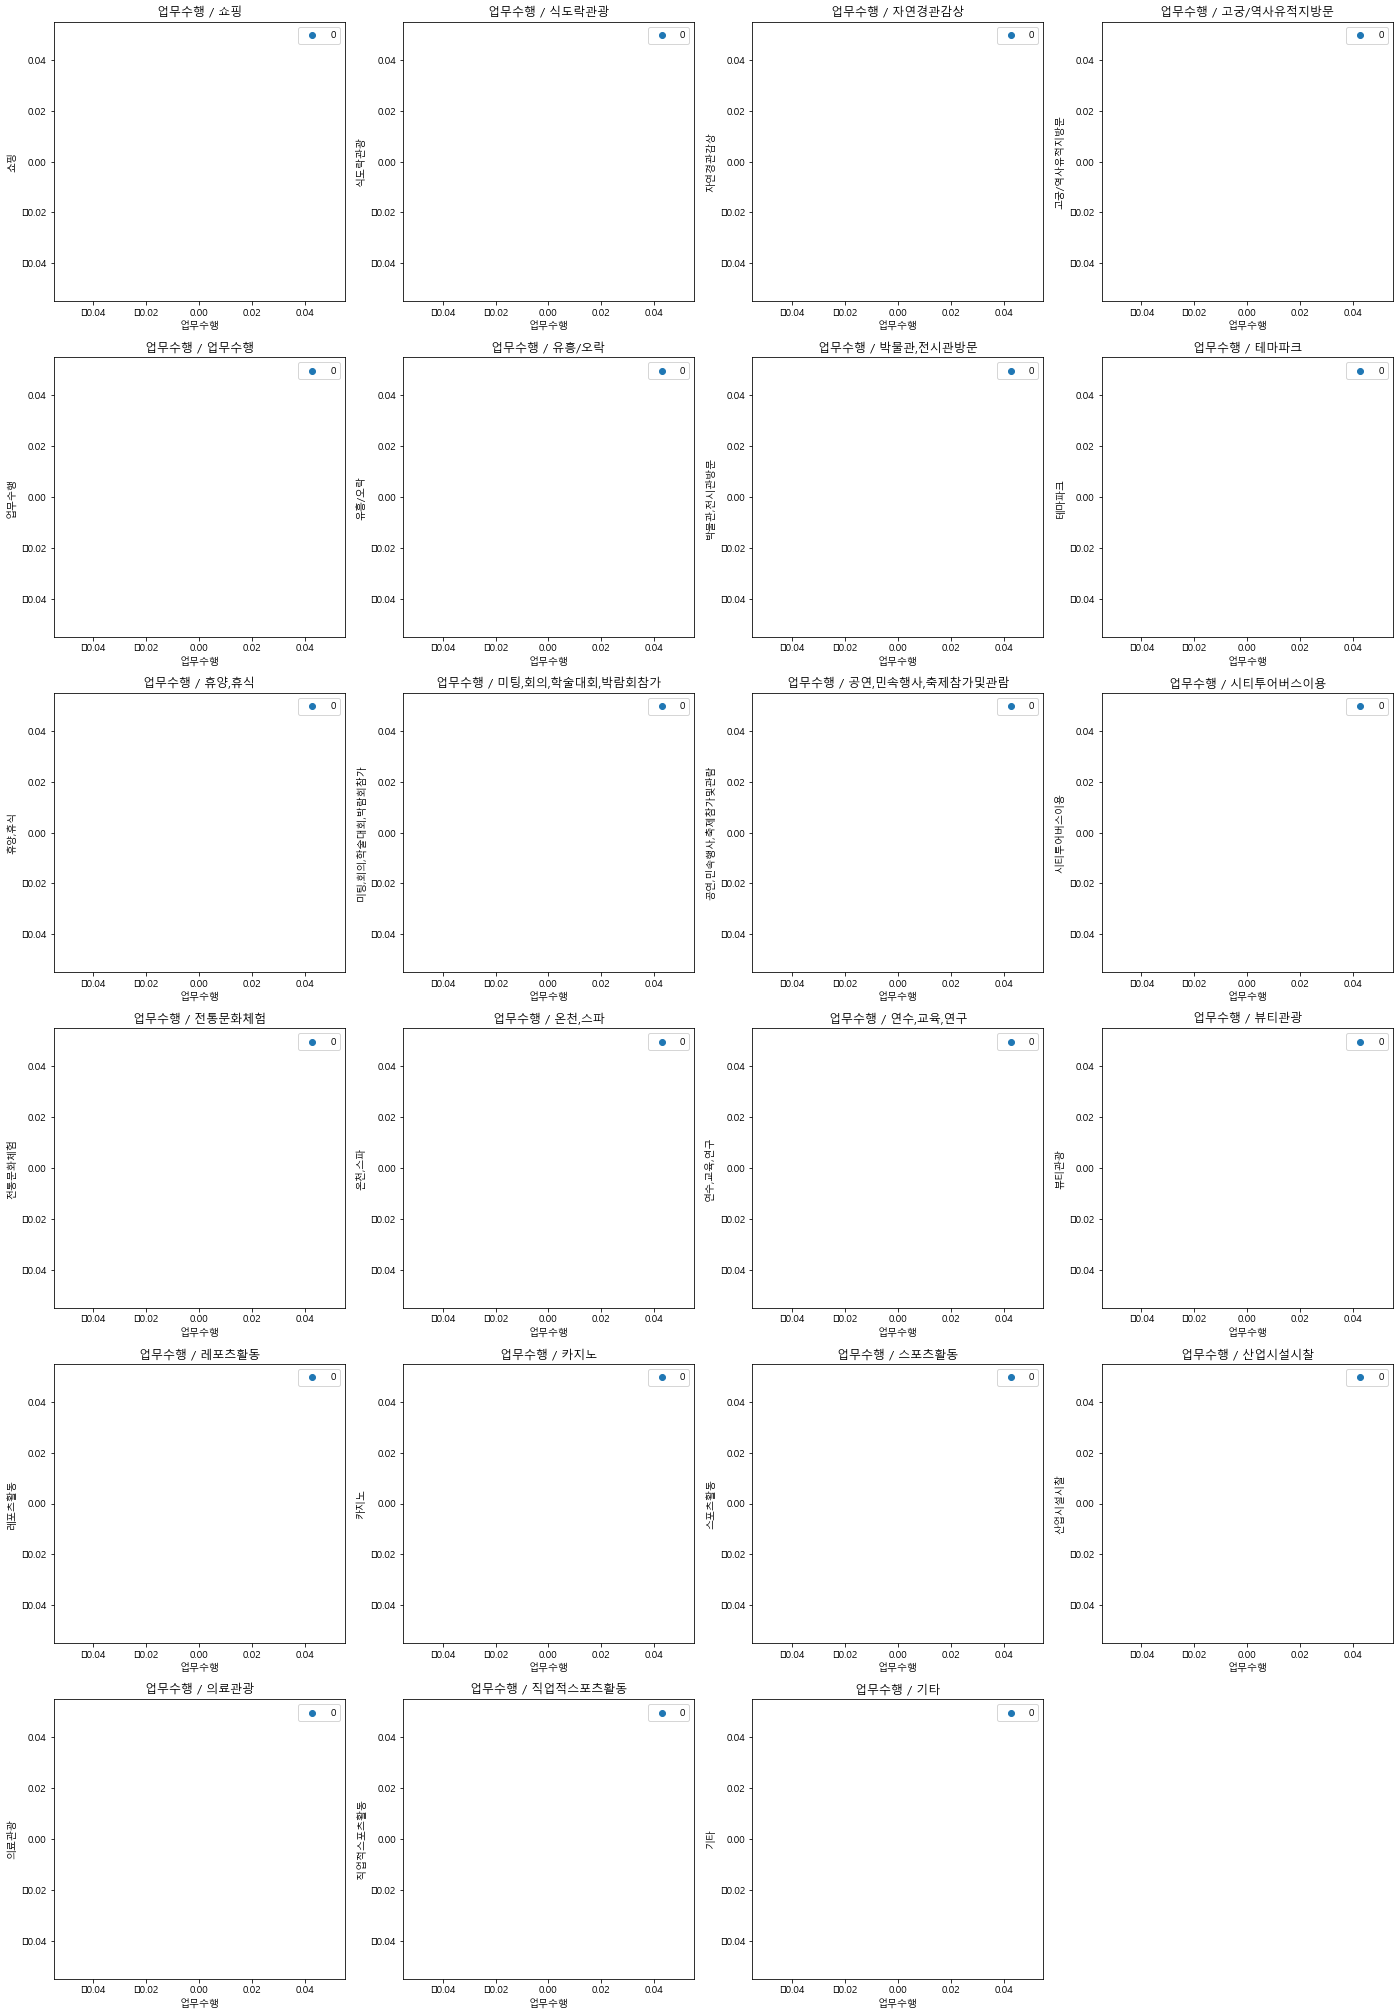

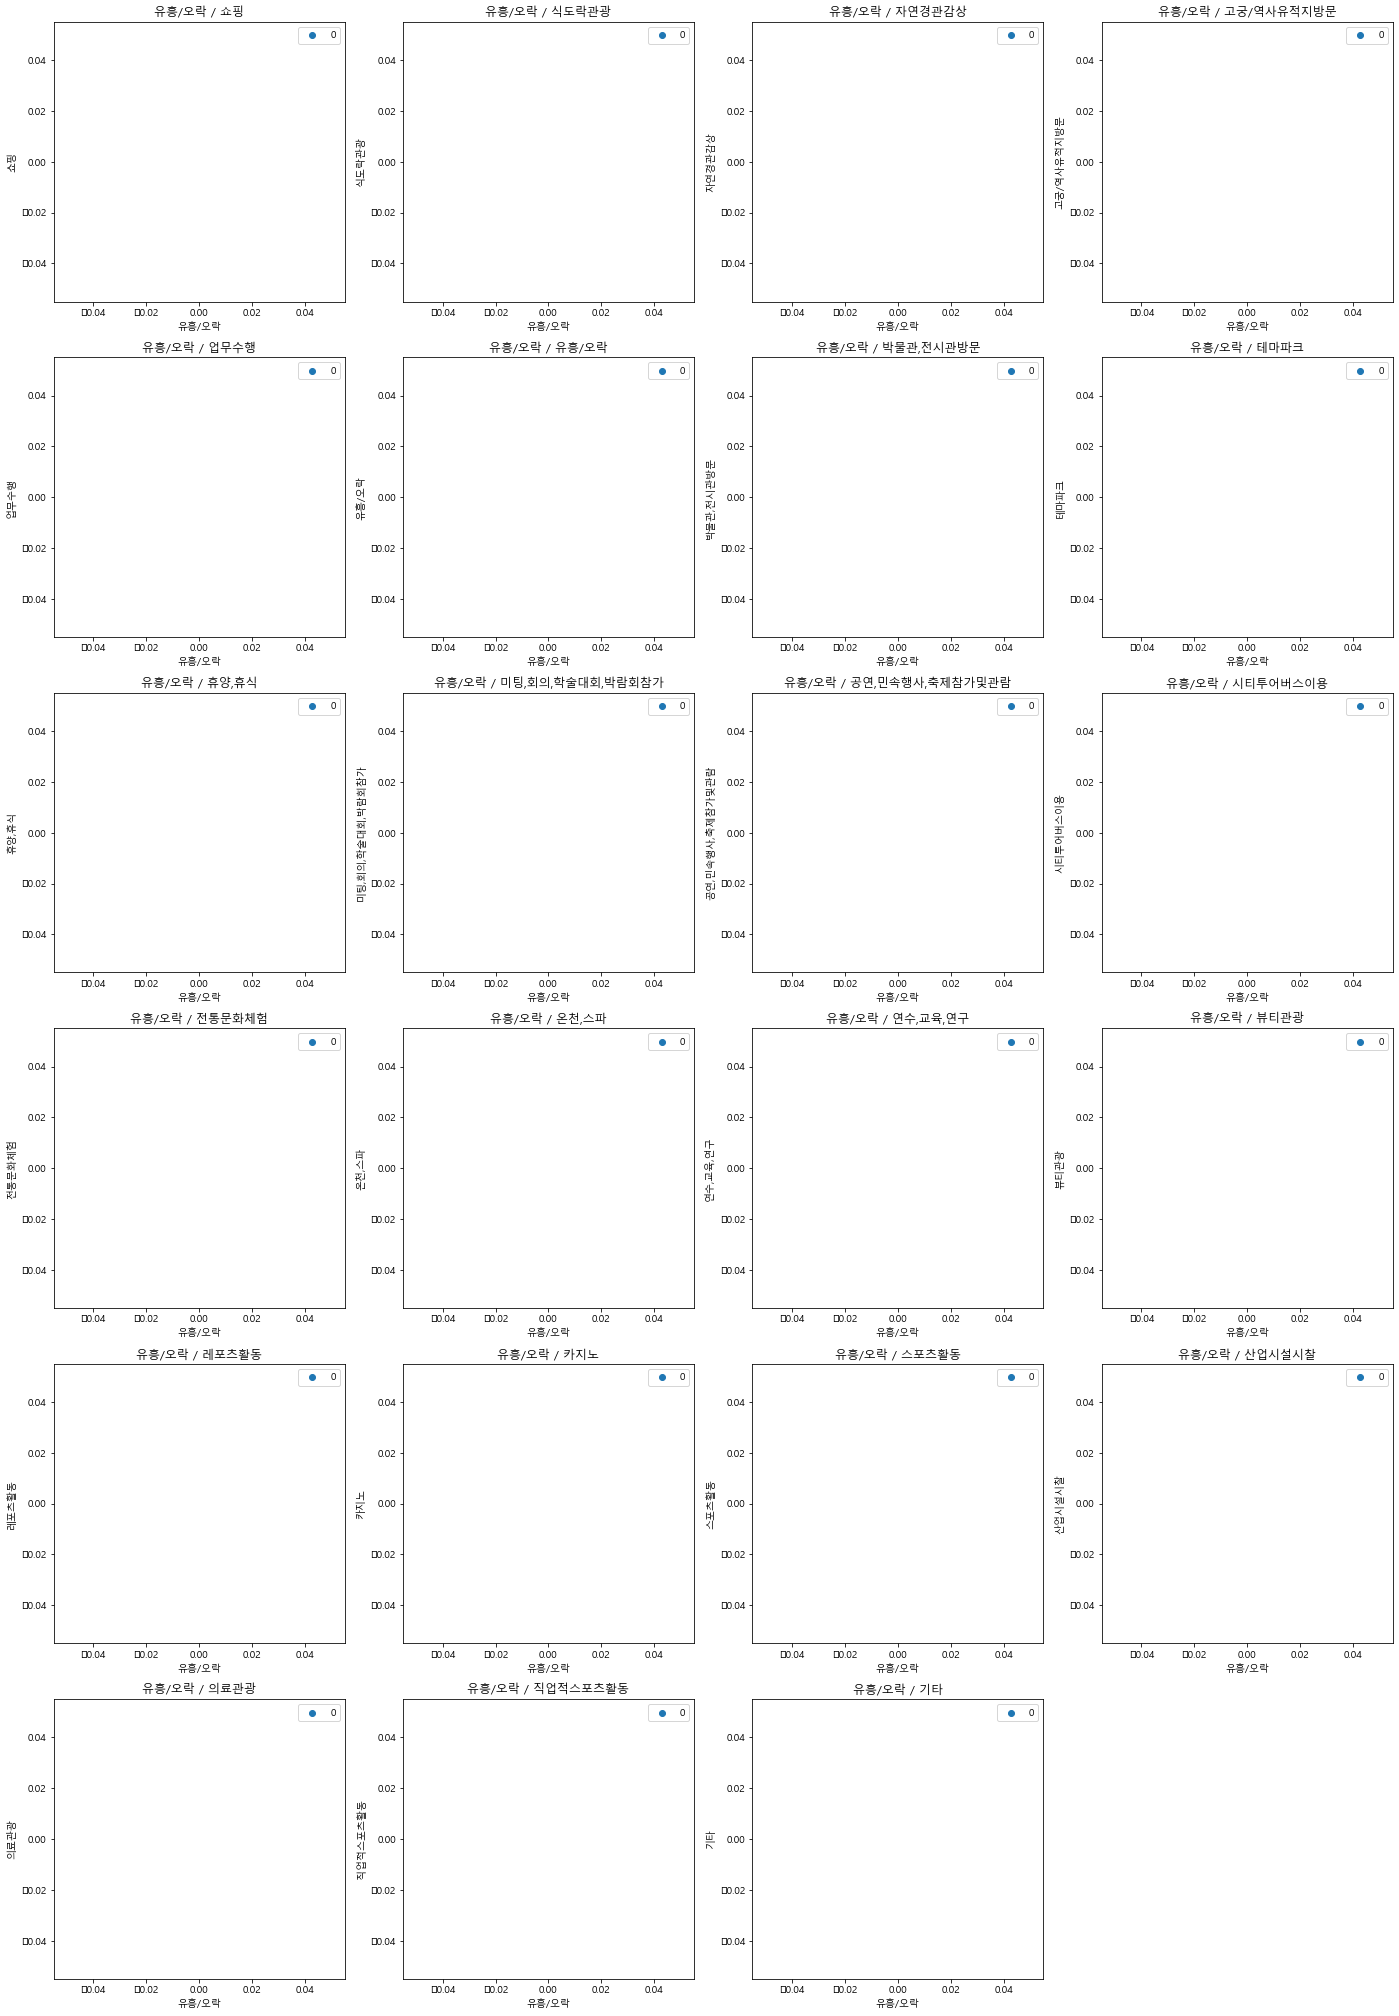

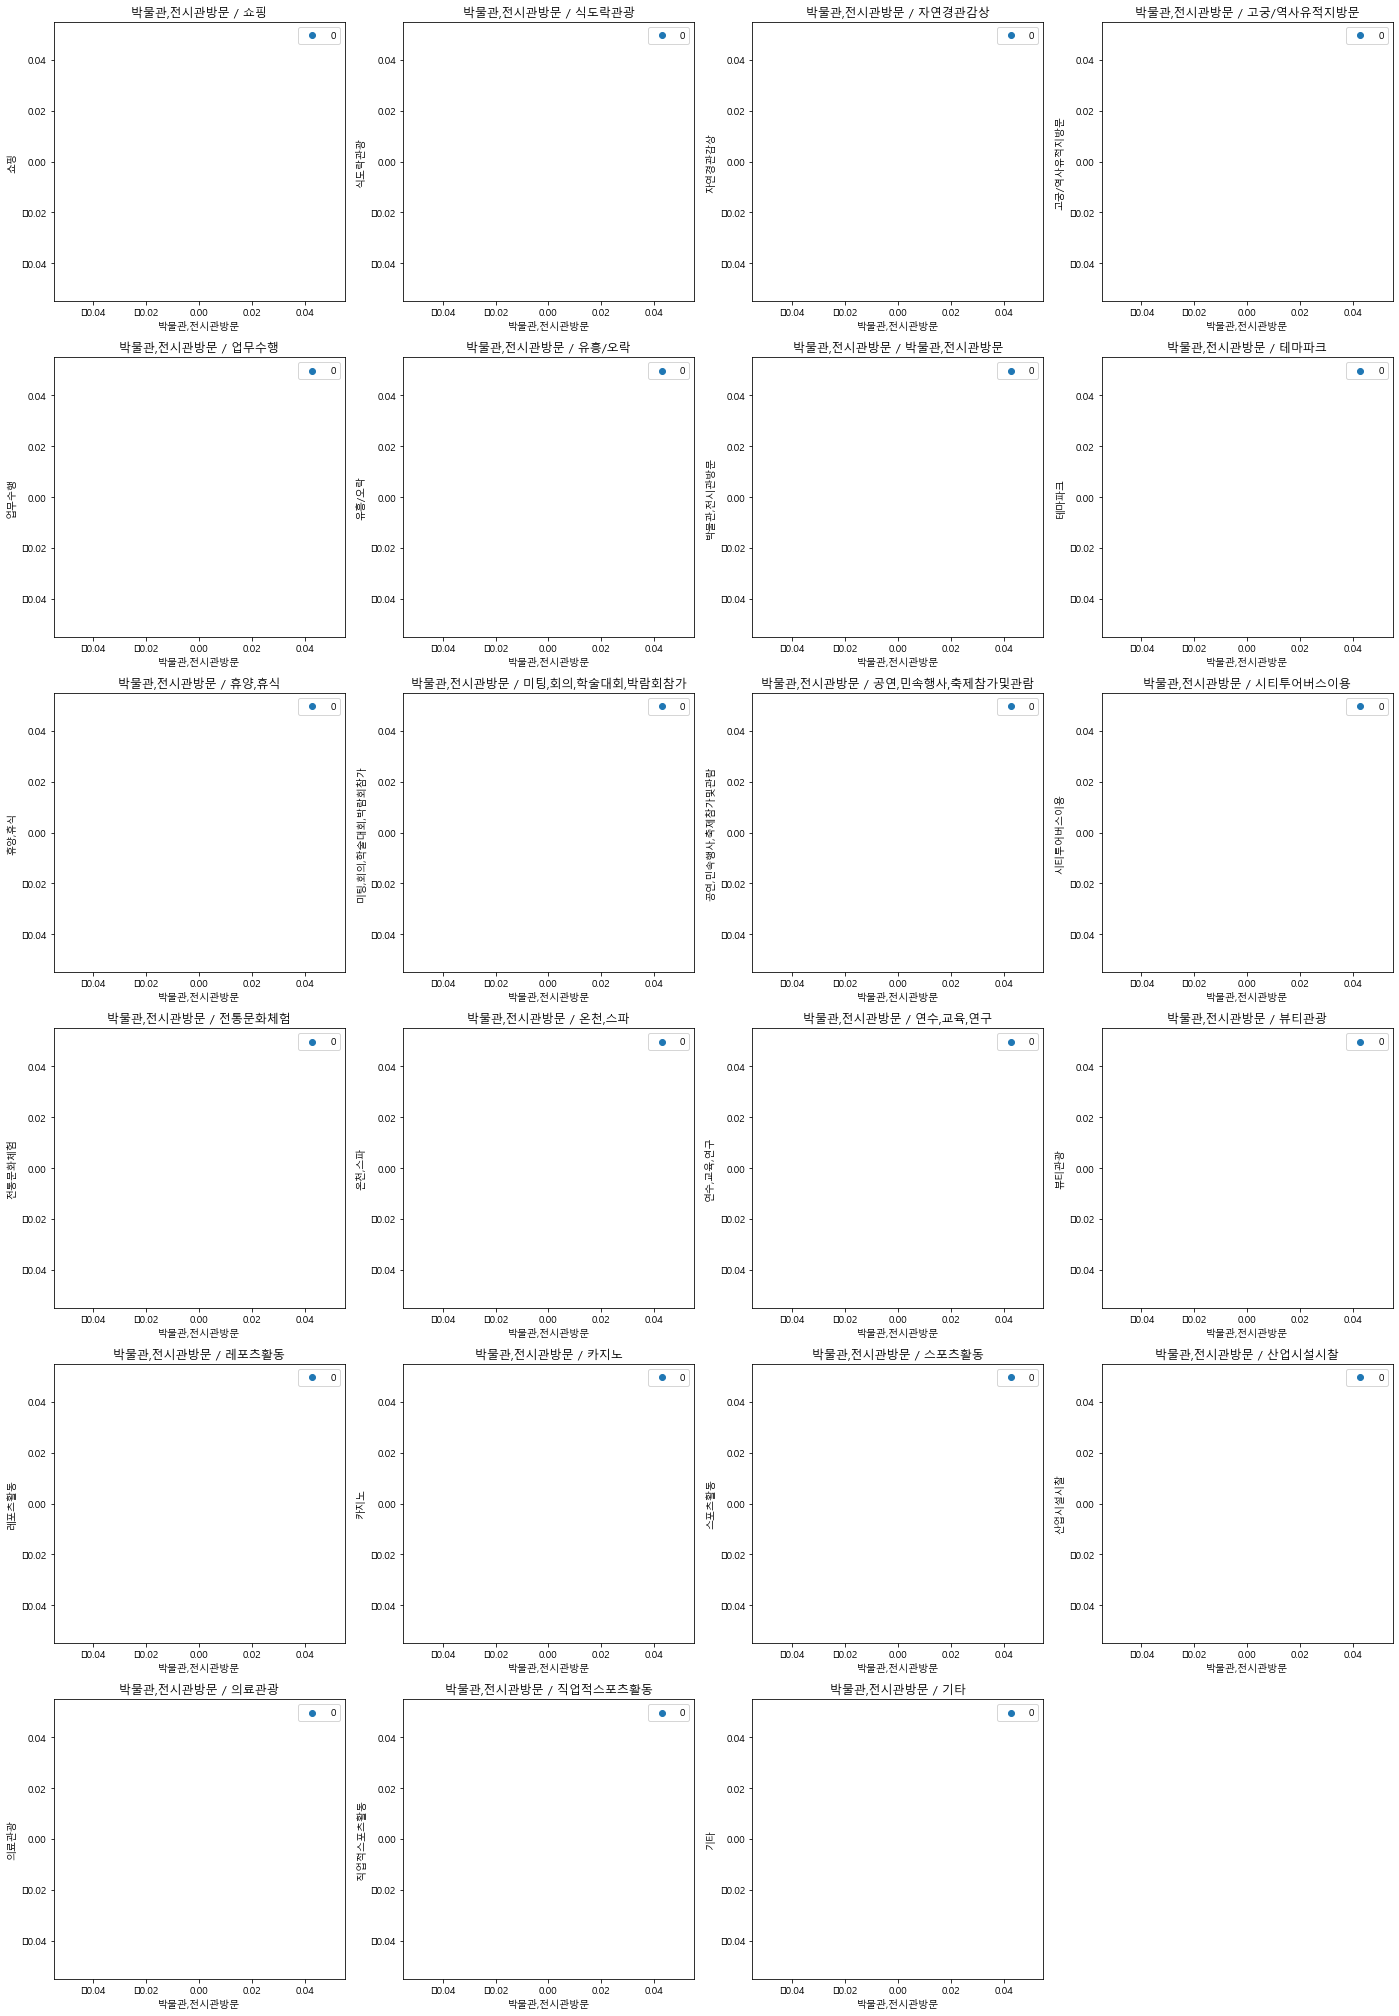

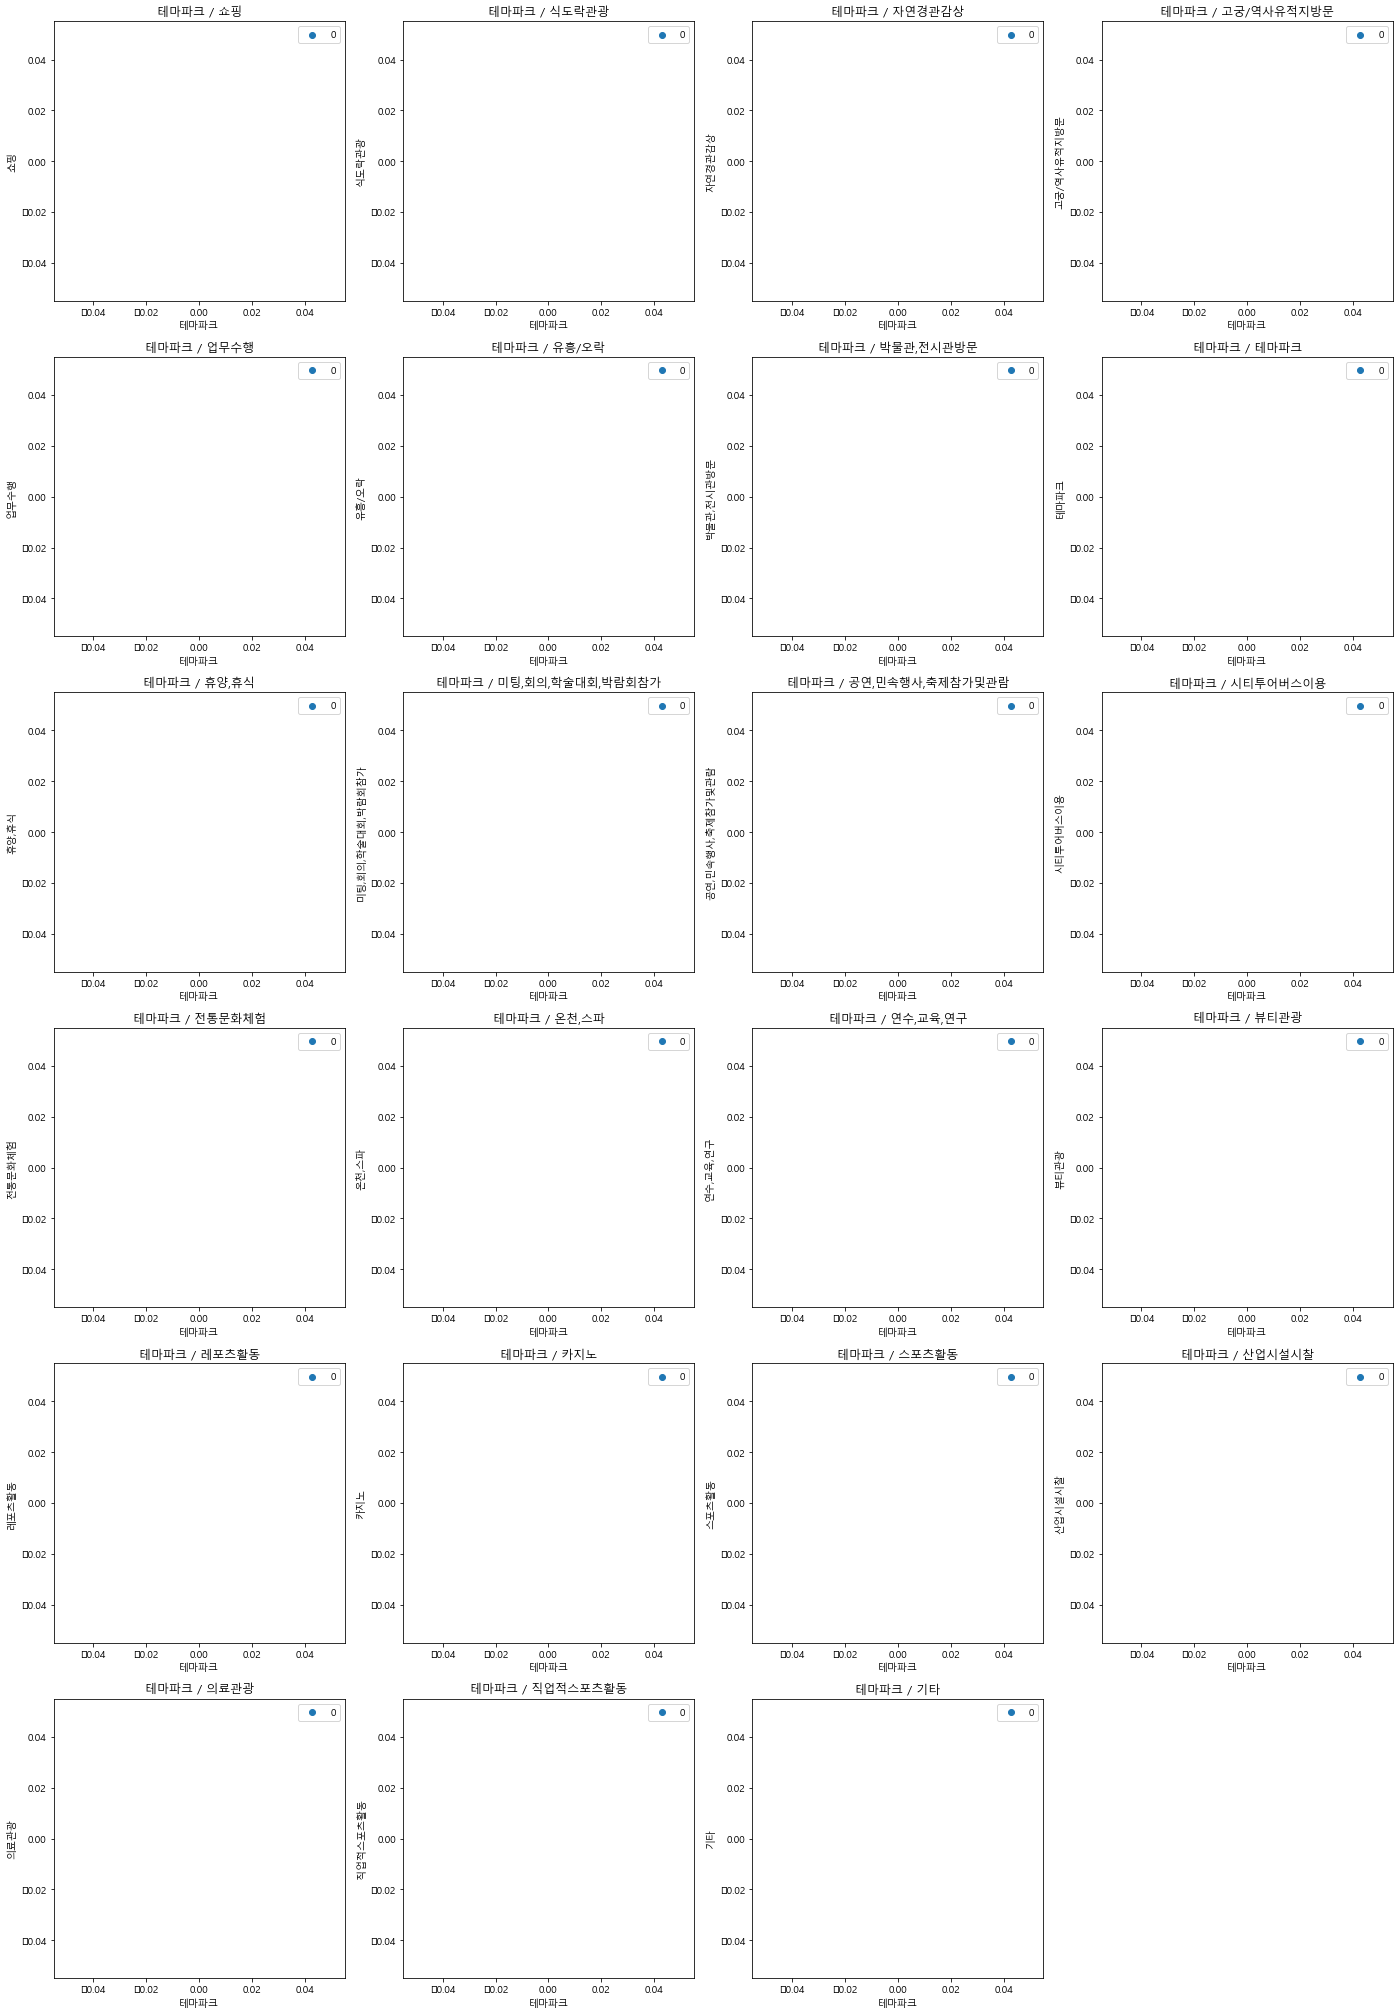

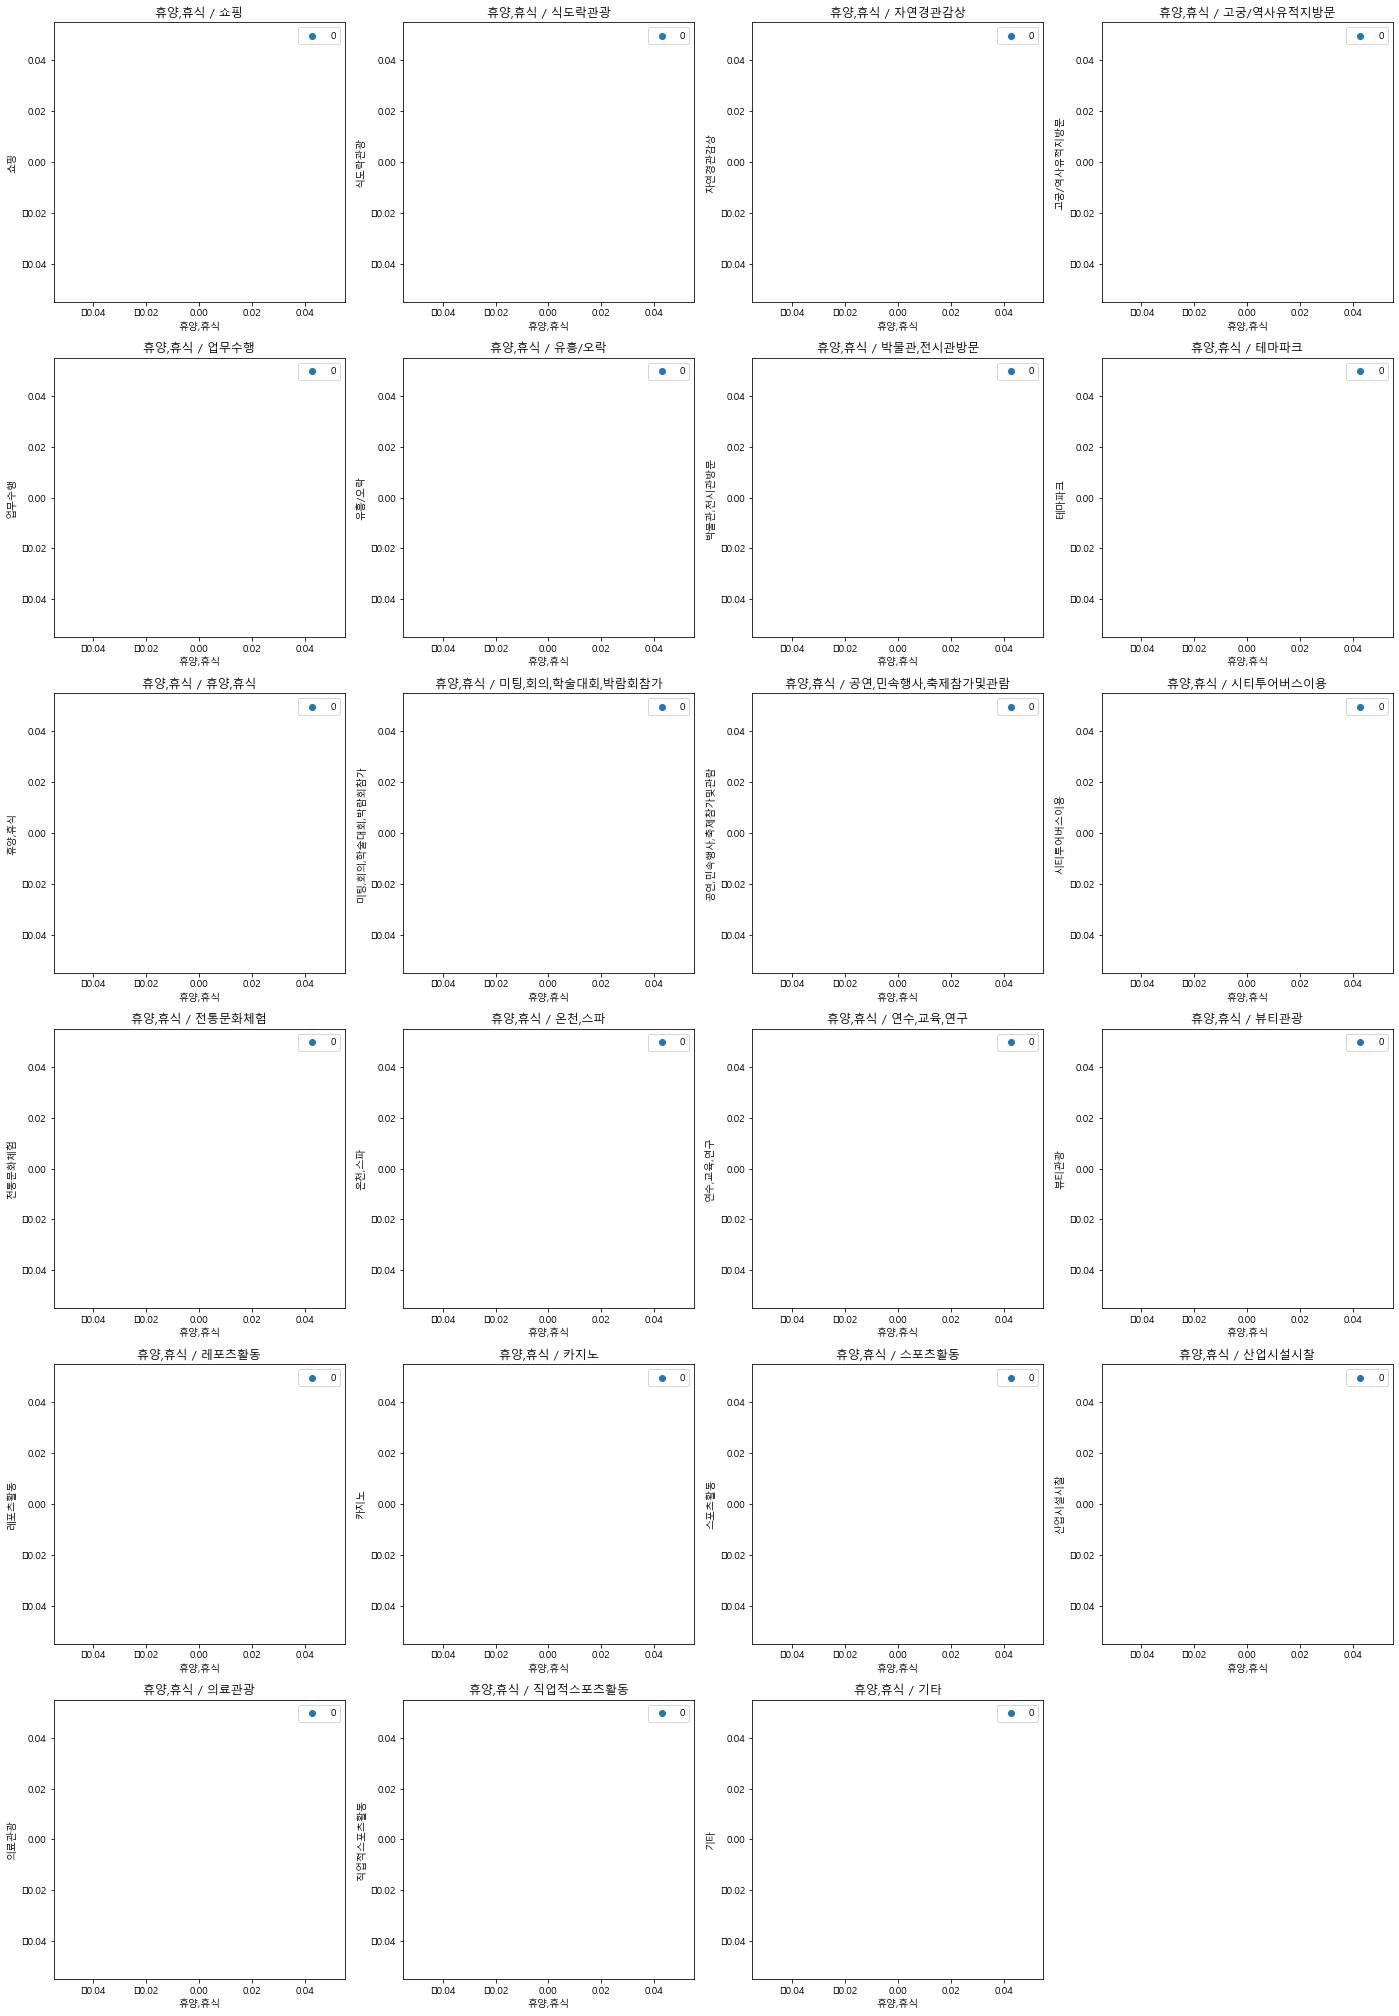

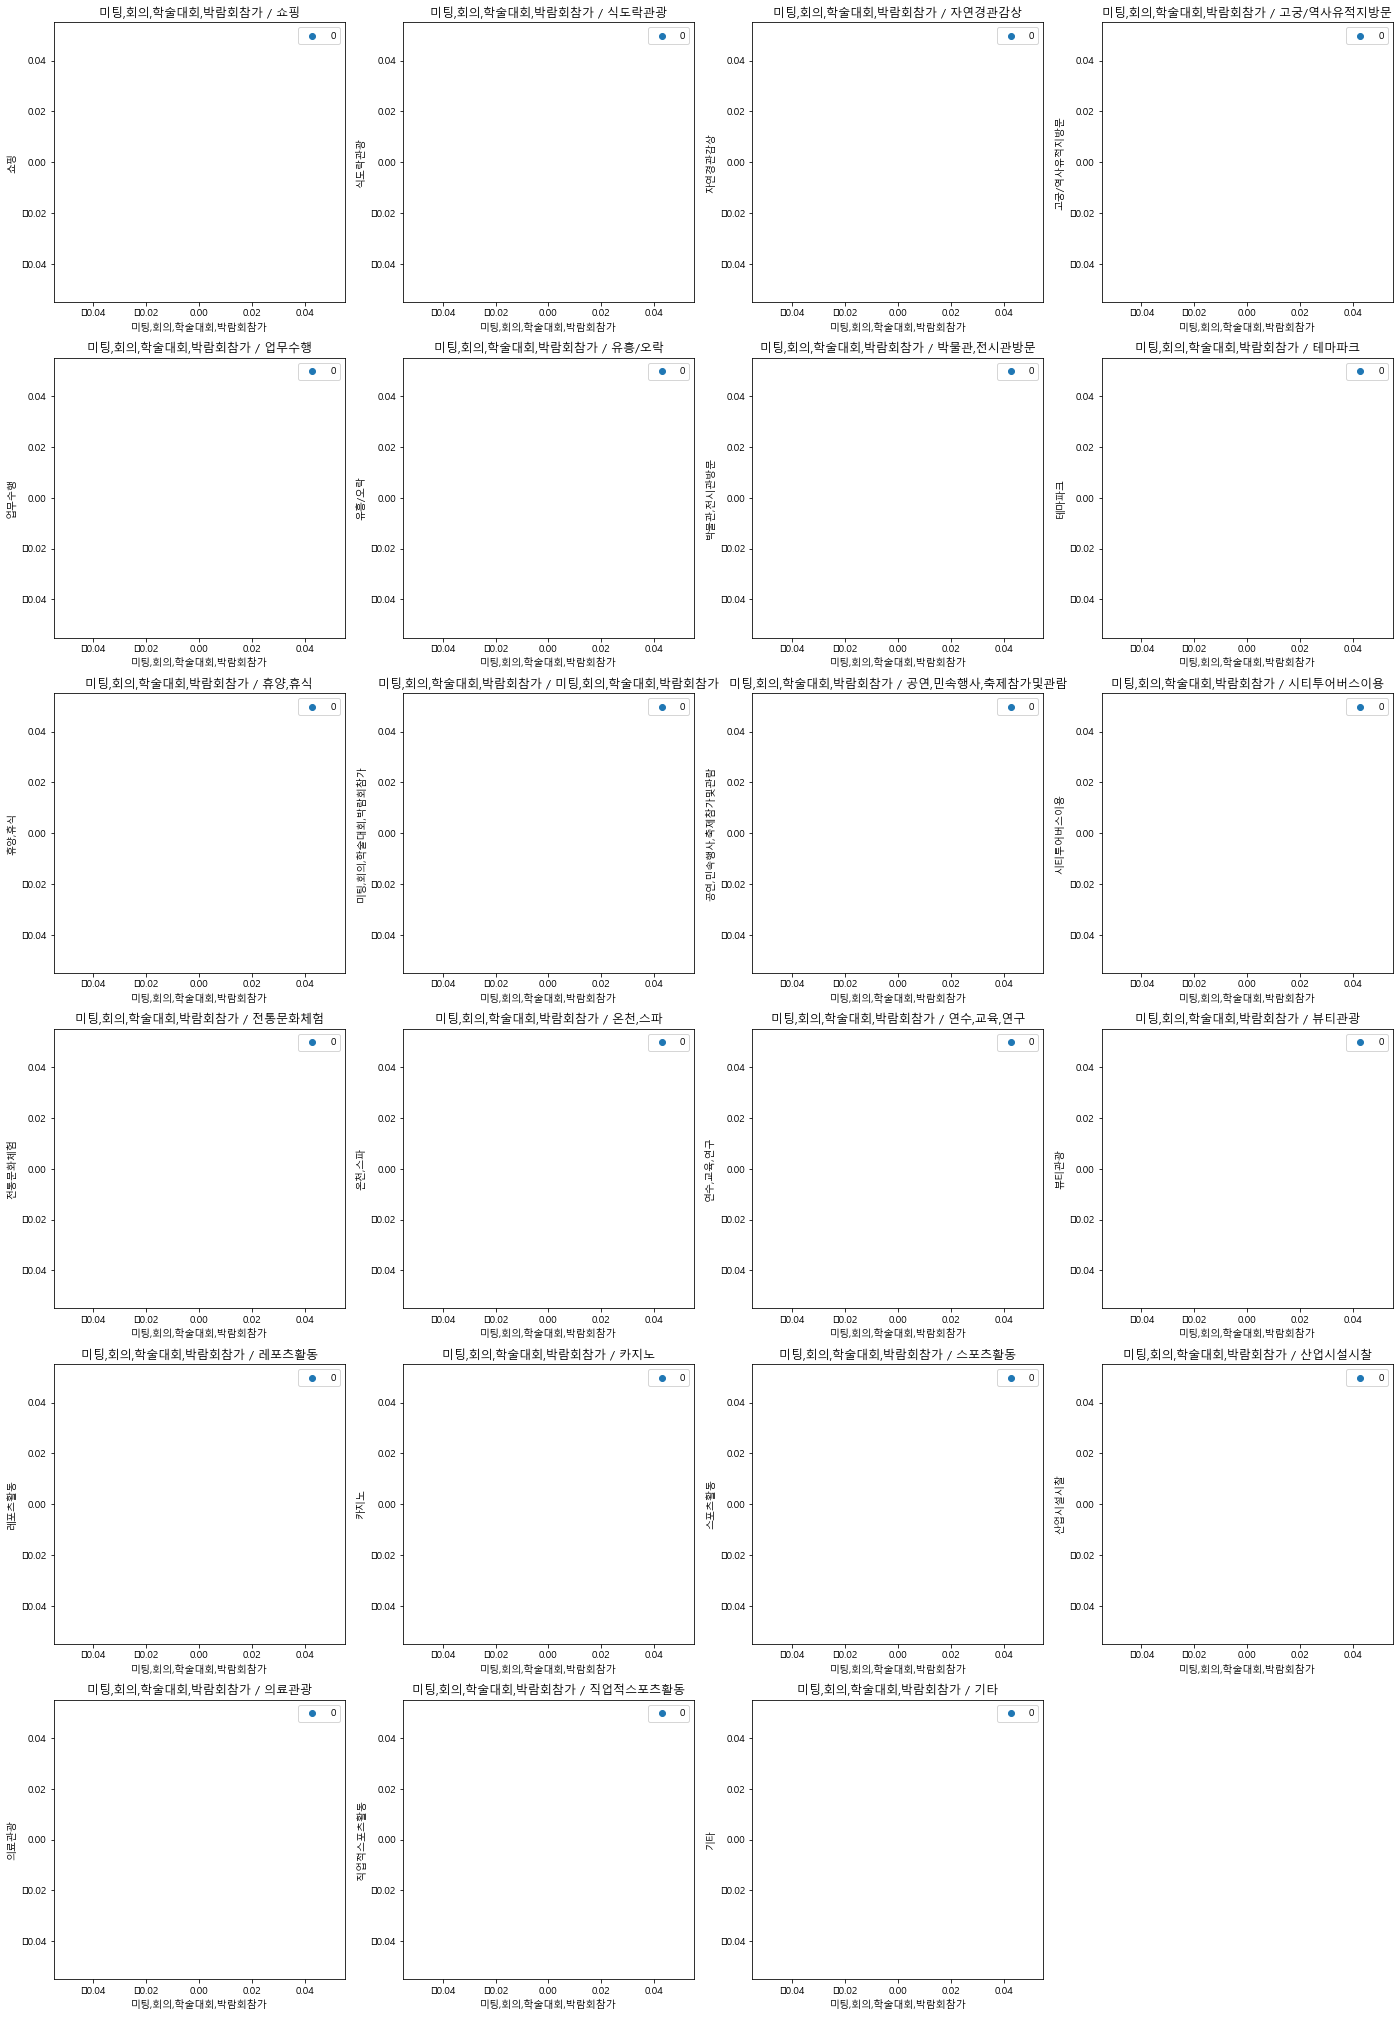

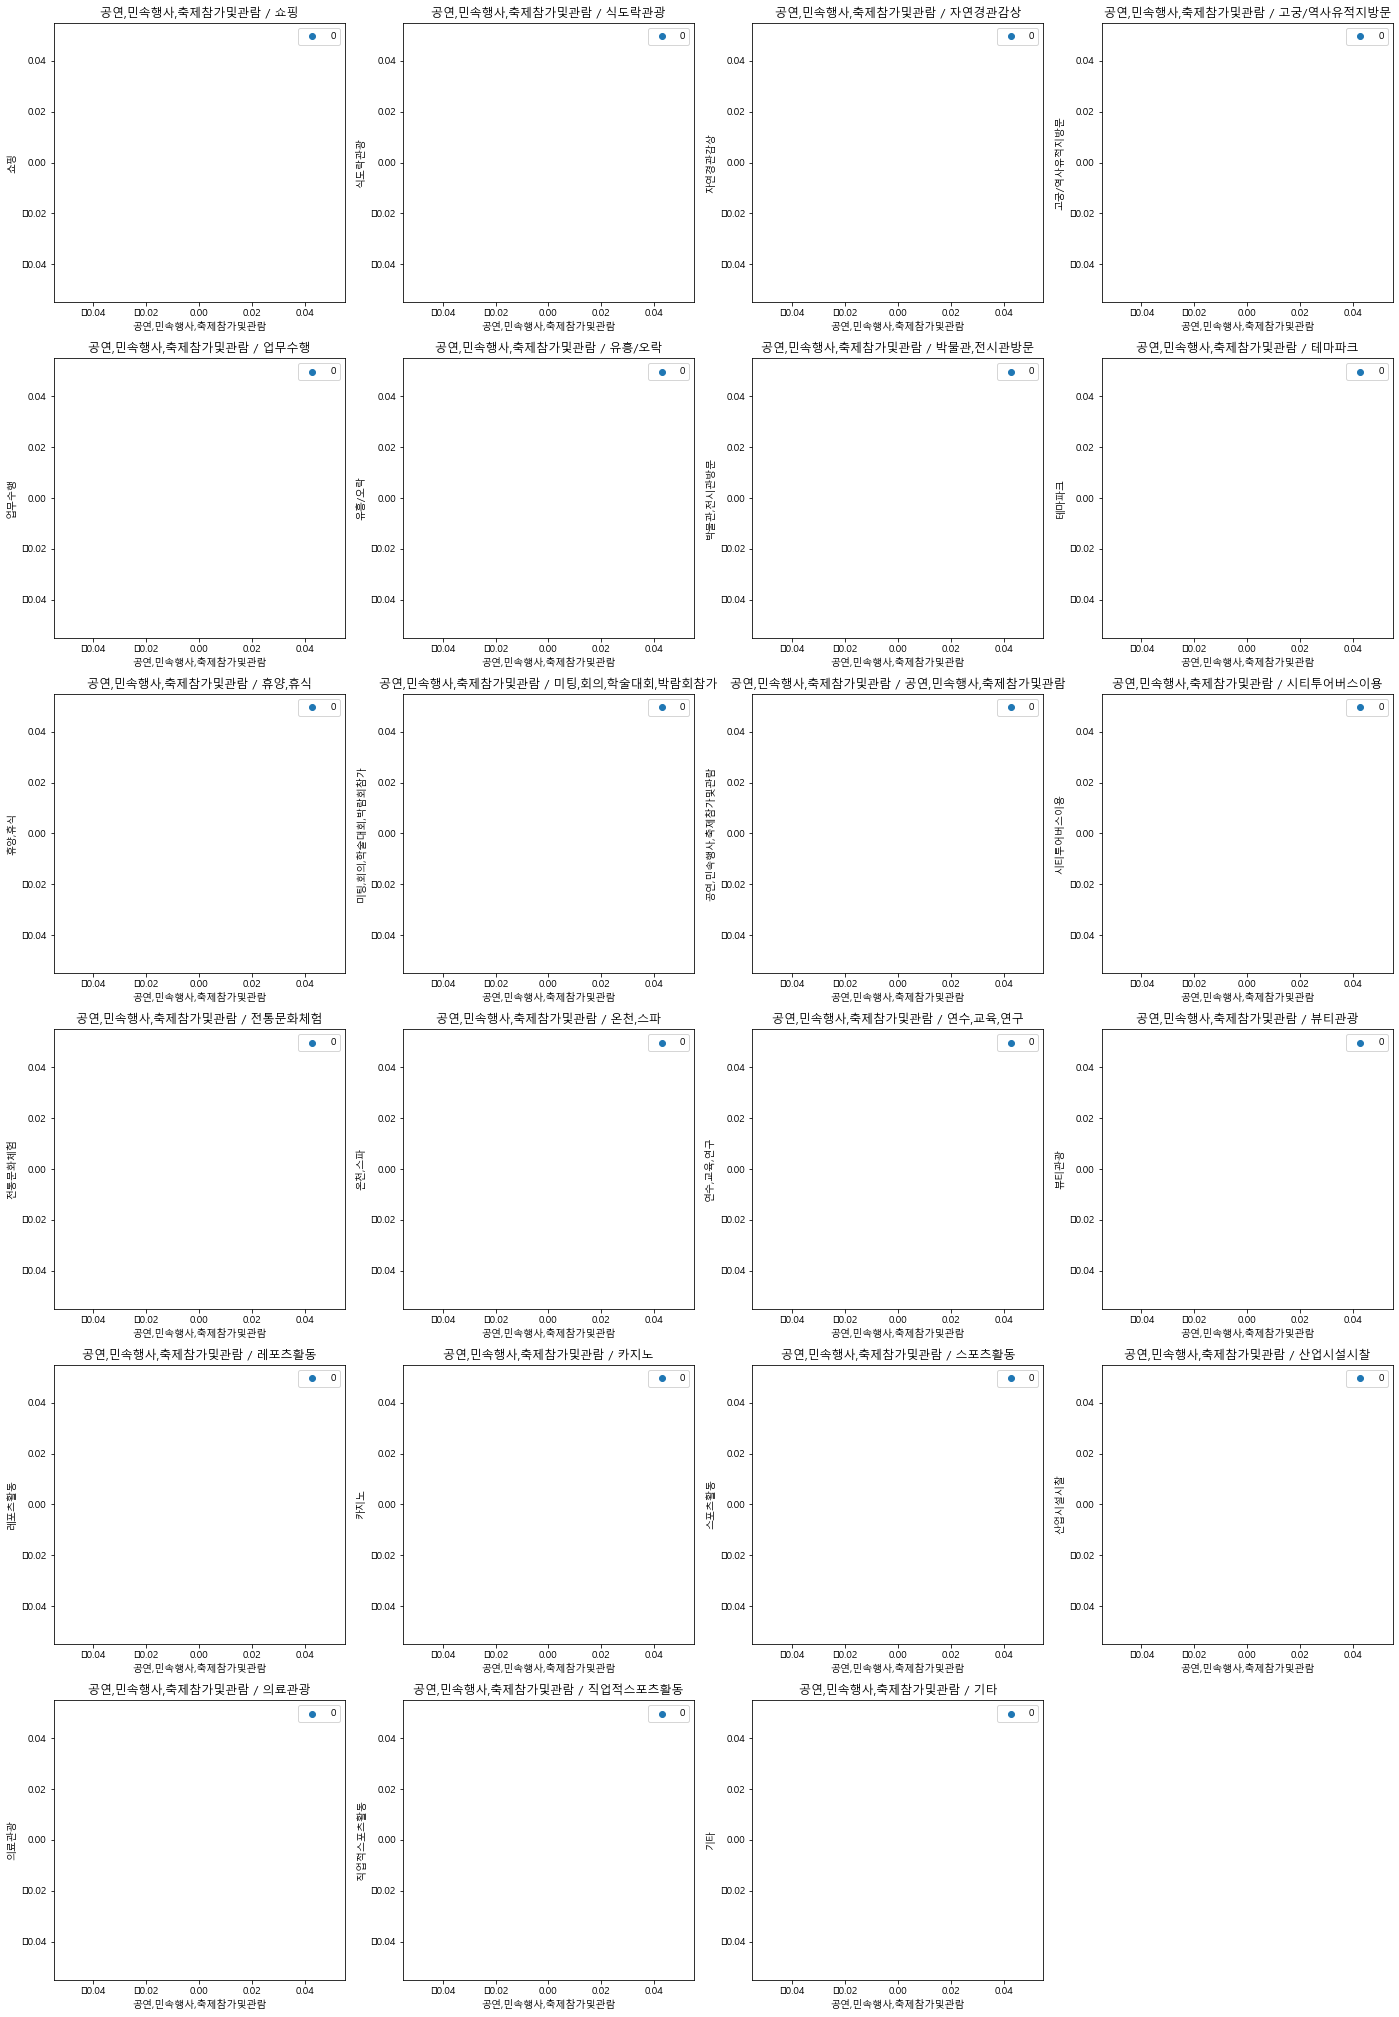

Error in callback <function flush_figures at 0x000002C608328280> (for post_execute):


KeyboardInterrupt: 

In [16]:
#### 군집 분석 ####
df['cluster'] = df_scaled['cluster'] # 원래 DataFrame 에 cluster 결과 넣기

c_length = len(df['cluster'].unique())
col = df.columns[0:23]

for i in col:
    plt.figure(figsize=(24,36))
    cnt = 1
    for k in col:
        plt.subplot(6,4,cnt)
        for j in range(c_length):
            plt.scatter(df[df['cluster'] == j][f'{i}'], df[df['cluster'] == j][f'{k}'], label=f'{j}')
        plt.title(f'{i} / {k}')
        plt.xlabel(f'{i}')
        plt.ylabel(f'{k}')
        plt.legend()
        cnt += 1

In [ ]:
#### 분석 ####
c_count = df['cluster'].value_counts()
c_list = list(c_count)

plt.figure(figsize=(6,6))
plt.pie(c_list, labels=c_count.index, autopct='%.1f%%', wedgeprops={'width': 0.6})

print(c_count)

In [ ]:
#### 군집별 컬럼별 평균 ####

length = len(df['cluster'].unique())

plt.figure(figsize=(16,16))
for i in range(0, length):
    temp_x = df[df['cluster'] == i][col].columns
    temp_y = df[df['cluster'] == i][col].mean()
    plt.subplot(2,2,i+1)
    plt.bar(temp_x, temp_y)
    plt.title(f'군집 {i}')
    plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(24, 36))
cnt = 1
for columns in col:
    plt.subplot(6, 4, cnt)
    for i in range(c_length):
        plt.bar(i, df[df['cluster'] == i][columns].mean(), label=f'{i}')
        plt.title(columns)
        plt.xticks(range(i+1))
        plt.legend()
    cnt += 1

In [ ]:
# 연령별 컬럼별 값 변화
col_age = df.columns[23:30]

plt.figure(figsize=(24,36))
cnt = 1
for columns in col:
    plt.subplot(6,4,cnt)
    for age in col_age:
        plt.plot(df[df[f'{age}'] == 1][f'{columns}'], '-o', label=f'{age}')
    cnt += 1
    plt.title(f'연령 / {columns}')
    plt.legend()

In [ ]:
# 군집별 컬럼별 값?

plt.figure(figsize=(24, 36))
cnt = 1

for columns in col:
    plt.subplot(6,4,cnt)
    for i in range(0, length):
        plt.scatter(df[df['cluster'] == i][columns].index, df[df['cluster'] == i][columns], label=f'{i}')
        plt.title(f'군집별 / {columns}')
    plt.legend()
    cnt += 1

In [ ]:
col_year = df.columns[30:-1]

for i in range(length):
    print('군집', i)
    for k in col_year:
        print(df[(df['cluster'] == i) & df[k] == 1][k].value_counts())

In [ ]:
for i in range(length):
    print('군집', i)
    for k in col_age:
        print(df[(df['cluster'] == i) & df[k] == 1][k].value_counts())